# **Preparación de los Datos**

In [272]:
import pandas as pd
import numpy as np

datos_telecom_clean = "https://raw.githubusercontent.com/josefinamagini/challenge.telecomx2/refs/heads/main/telecom_clean.csv"

df = pd.read_csv(datos_telecom_clean)
df

,CustomerID,CustomerChurn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal,ChargesDaily
0,0002.orfbo,0,female,0,1,1,9,1,0,dsl,...,0,1,1,0,one.year,1,mailed.check,65.60,593.30,2.19
1,0003.mknfe,0,male,0,0,0,9,1,1,dsl,...,0,0,0,1,month.to.month,0,mailed.check,59.90,542.40,2.00
2,0004.tlhlj,1,male,0,0,0,4,1,0,fiber.optic,...,1,0,0,0,month.to.month,1,electronic.check,73.90,280.85,2.46
3,0011.igkff,1,male,1,1,0,13,1,0,fiber.optic,...,1,0,1,1,month.to.month,1,electronic.check,98.00,1237.85,3.27
4,0013.exchz,1,female,1,1,0,3,1,0,fiber.optic,...,0,1,1,0,month.to.month,1,mailed.check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987.lutyd,0,female,0,0,0,13,1,0,dsl,...,0,1,0,0,one.year,0,mailed.check,55.15,742.90,1.84
7263,9992.rramn,1,male,0,1,0,22,1,1,fiber.optic,...,0,0,0,1,month.to.month,1,electronic.check,85.10,1873.70,2.84
7264,9992.ujoel,0,male,0,0,0,2,1,0,dsl,...,0,0,0,0,month.to.month,1,mailed.check,50.30,92.75,1.68
7265,9993.lhieb,0,male,0,1,1,67,1,0,dsl,...,1,1,0,1,two.year,0,mailed.check,67.85,4627.65,2.26


In [273]:
#irrelevant drop
df = df.drop(columns=["CustomerID"])

df.head()

,CustomerChurn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal,ChargesDaily
0,0,female,0,1,1,9,1,0,dsl,0,...,0,1,1,0,one.year,1,mailed.check,65.6,593.30,2.19
1,0,male,0,0,0,9,1,1,dsl,0,...,0,0,0,1,month.to.month,0,mailed.check,59.9,542.40,2.00
2,1,male,0,0,0,4,1,0,fiber.optic,0,...,1,0,0,0,month.to.month,1,electronic.check,73.9,280.85,2.46
3,1,male,1,1,0,13,1,0,fiber.optic,0,...,1,0,1,1,month.to.month,1,electronic.check,98.0,1237.85,3.27
4,1,female,1,1,0,3,1,0,fiber.optic,0,...,0,1,1,0,month.to.month,1,mailed.check,83.9,267.40,2.80


In [274]:
print(df.columns)

Index(['CustomerChurn', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'ChargesMonthly', 'ChargesTotal', 'ChargesDaily'],
      dtype='object')


In [292]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

#separar target
y = df["CustomerChurn"]
X = df.drop(columns=["CustomerChurn"])

#train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#categóricas y numéricas
categorical_cols = [
    "Gender", "Partner", "Dependents", "PhoneService", "MultipleLines",
    "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies", "Contract",
    "PaperlessBilling", "PaymentMethod"
]

numeric_cols = [
    "SeniorCitizen", "Tenure", "ChargesMonthly", "ChargesTotal", "ChargesDaily"
]

#processor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="median")),            # <-- imputación numérica
            ("scaler", StandardScaler())
        ]), numeric_cols),

        ("cat", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),     # <-- imputación categórica
            ("encoder", OneHotEncoder(drop="first", handle_unknown="ignore"))
        ]), categorical_cols)
    ]
)

#adjust
X_train_enc = preprocessor.fit_transform(X_train)
X_test_enc = preprocessor.transform(X_test)

print("Dimensión original:", X_train.shape)
print("Dimensión transformada:", X_train_enc.shape)

ohe = preprocessor.named_transformers_["cat"]
ohe_cols = ohe.get_feature_names_out(categorical_cols)

all_cols = numeric_cols + list(ohe_cols)

X_train_enc_df = pd.DataFrame(X_train_enc.toarray() if hasattr(X_train_enc, "toarray") else X_train_enc,
                              columns=all_cols, index=X_train.index)

X_train_enc_df.head()

Dimensión original: (5634, 21)
Dimensión transformada: (5634, 24)


,SeniorCitizen,Tenure,ChargesMonthly,ChargesTotal,ChargesDaily,Gender_male,Partner_1,Dependents_1,PhoneService_1,MultipleLines_1,...,DeviceProtection_1,TechSupport_1,StreamingTV_1,StreamingMovies_1,Contract_one.year,Contract_two.year,PaperlessBilling_1,PaymentMethod_credit.card,PaymentMethod_electronic.check,PaymentMethod_mailed.check
3902,-0.438325,1.124891,0.968250,1.398543,0.971543,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3281,-0.438325,-0.827880,-1.521717,-0.914907,-1.526570,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5071,-0.438325,-1.234707,0.513560,-0.947959,0.511891,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4038,-0.438325,0.026457,0.323690,0.070054,0.322034,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3970,-0.438325,-0.746514,0.698434,-0.496596,0.701747,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [276]:
#proporción de churn

churn_pct = df["CustomerChurn"].value_counts(normalize=True) * 100
print(churn_pct.round(2))
print(df["CustomerChurn"].value_counts())

CustomerChurn
 0    71.20
 1    25.72
-1     3.08
Name: proportion, dtype: float64
CustomerChurn
 0    5174
 1    1869
-1     224
Name: count, dtype: int64


In [277]:
#filtro casos con "no answer" (3%)
df = df[df["CustomerChurn"] != -1]

print(df["CustomerChurn"].value_counts())
print(df["CustomerChurn"].value_counts(normalize=True).mul(100).round(2))

CustomerChurn
0    5174
1    1869
Name: count, dtype: int64
CustomerChurn
0    73.46
1    26.54
Name: proportion, dtype: float64


#🔹 Verificación de Balance de Clases

Después de filtrar los registros con valor -1 (clientes con "no answer"), la variable CustomerChurn quedó distribuida de la siguiente manera:

**No Churn (0)**: ~73%

**Churn (1):** ~27%

Esto significa que existe un **desbalance moderado** entre las clases, ya que la mayoría de los clientes permanecen activos.**texto en negrita**

In [278]:
#utilizaré como baseline LOgistic Regression, por lo que si es necesario estandarizar
categorical_cols = [
    "Gender","Partner","Dependents","PhoneService","MultipleLines",
    "InternetService","OnlineSecurity","OnlineBackup","DeviceProtection",
    "TechSupport","StreamingTV","StreamingMovies","Contract",
    "PaperlessBilling","PaymentMethod"
]

numeric_cols = [
    "SeniorCitizen","Tenure","ChargesMonthly","ChargesTotal","ChargesDaily"
]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),  # estandarización
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols)
    ]
)

#**Correlación y Selección de Variables**

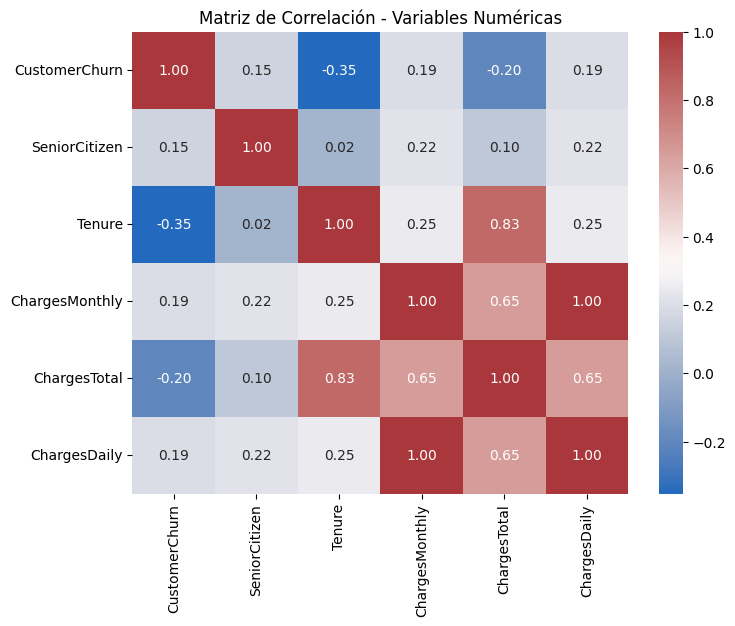

In [279]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las numéricas + target
num_cols = ["CustomerChurn","SeniorCitizen","Tenure","ChargesMonthly","ChargesTotal","ChargesDaily"]

plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="vlag", fmt=".2f")
plt.title("Matriz de Correlación - Variables Numéricas")
plt.show()

#🔹 Conclusiones

**1. Variables numéricas relevantes para churn:**

* Tenure (la más influyente, relación negativa fuerte).

* ChargesMonthly (impacto positivo moderado).

* SeniorCitizen (impacto débil pero existente).

**2. Variables redundantes que deberían eliminarse:**

* ChargesTotal

* ChargesDaily








#🔹 Challenge: Análisis Dirigido

**1. Tiempo de contrato × Cancelación**

Queremos ver si el tipo de contrato 'Contract' tiene impacto en la probabilidad de cancelar 'CustomerChurn'.

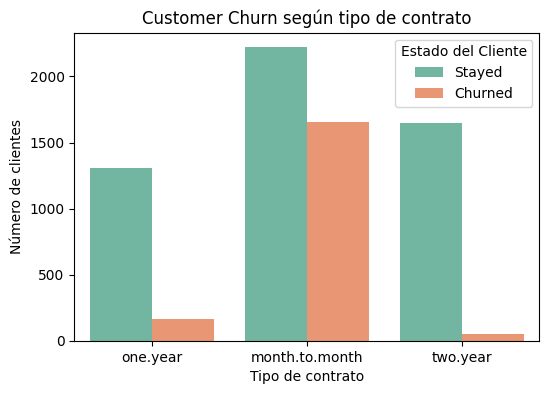

In [280]:
df["ChurnLabel"] = df["CustomerChurn"].map({0: "Stayed", 1: "Churned"})

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Contract", hue="ChurnLabel", palette="Set2")
plt.title("Customer Churn según tipo de contrato")
plt.ylabel("Número de clientes")
plt.xlabel("Tipo de contrato")
plt.legend(title="Estado del Cliente")
plt.show()

**2. Gasto total × Cancelación**

Queremos ver si el gasto acumulado (ChargesTotal) está asociado con la cancelación.

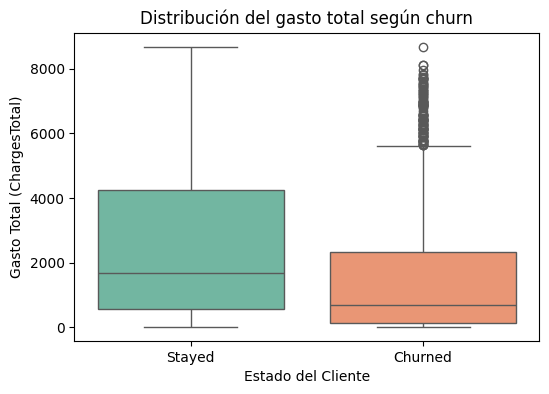

In [281]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="ChurnLabel", y="ChargesTotal", hue="ChurnLabel", palette="Set2", legend=False)
plt.title("Distribución del gasto total según churn")
plt.xlabel("Estado del Cliente")
plt.ylabel("Gasto Total (ChargesTotal)")
plt.show()

**3. Scatter plot opcional (Tenure vs Gasto total, coloreado por Churn)**

Esto ayuda a ver la relación combinada:

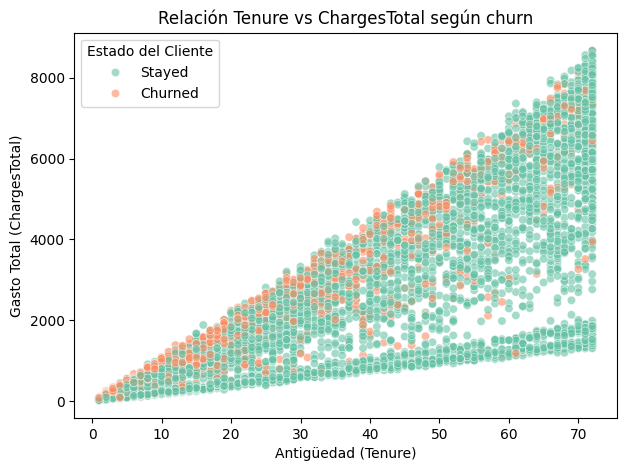

In [282]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="Tenure", y="ChargesTotal", hue="ChurnLabel", alpha=0.6, palette="Set2")
plt.title("Relación Tenure vs ChargesTotal según churn")
plt.xlabel("Antigüedad (Tenure)")
plt.ylabel("Gasto Total (ChargesTotal)")
plt.legend(title="Estado del Cliente")
plt.show()

#**Modelado Predictivo**

#🔹 Justificación de la elección de modelos

**Regresión Logística**

* Sensible a la escala de las variables.

* Necesita estandarización para que los coeficientes se interpreten correctamente y la optimización converja bien.

* Nos servirá como modelo baseline.

**Random Forest**

* No depende de la escala de los datos (se basa en reglas de decisión).

* No requiere normalización.

* Modelo robusto y capaz de capturar interacciones no lineales entre variables.

---

Esta combinación permite mostrar claramente cuándo normalizar es necesario y cómo afecta al modelado.

In [283]:
from sklearn.compose import make_column_selector as selector
from sklearn.model_selection import train_test_split

X_train = X_train.copy()
X_test  = X_test.copy()

#clean NaN
cat_cols_auto = selector(dtype_include=object)(X_train)
for c in cat_cols_auto:
    X_train[c] = X_train[c].replace(["", " "], np.nan)
    X_test[c]  = X_test[c].replace(["", " "], np.nan)

suspect_nums = ["SeniorCitizen","Tenure","ChargesMonthly","ChargesTotal","ChargesDaily"]
for c in suspect_nums:
    if c in X_train.columns and X_train[c].dtype == object:
        X_train[c] = pd.to_numeric(X_train[c], errors="coerce")
        X_test[c]  = pd.to_numeric(X_test[c],  errors="coerce")

#columnas type
num_cols_auto = selector(dtype_exclude=object)(X_train)
cat_cols_auto = selector(dtype_include=object)(X_train)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler())
        ]), num_cols_auto),

        ("cat", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("encoder", OneHotEncoder(drop="first", handle_unknown="ignore"))
        ]), cat_cols_auto),
    ]
)

In [284]:
#separación target y features
y = df["CustomerChurn"]
X = df.drop(columns=["CustomerChurn", "ChurnLabel"])

#división train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Tamaño entrenamiento:", X_train.shape)
print("Tamaño prueba:", X_test.shape)
print("Proporción entrenamiento:", len(X_train)/len(df))
print("Proporción prueba:", len(X_test)/len(df))

Tamaño entrenamiento: (5634, 20)
Tamaño prueba: (1409, 20)
Proporción entrenamiento: 0.7999432060201619
Proporción prueba: 0.20005679397983814


In [285]:
Xt_train = preprocessor.fit_transform(X_train)
Xt_test  = preprocessor.transform(X_test)

to_dense = (lambda a: a.toarray()) if hasattr(Xt_train, "toarray") else (lambda a: a)
print("NaN en Xt_train:", np.isnan(to_dense(Xt_train)).sum())
print("NaN en Xt_test :", np.isnan(to_dense(Xt_test)).sum())

NaN en Xt_train: 0
NaN en Xt_test : 0


In [286]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# --- Modelo 1: Regresión Logística ---
logreg_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42))
])

# --- Modelo 2: Random Forest ---
rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42))
])

logreg_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents', 'Tenure',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'PaperlessB...g',
                                                   'ChargesMonthly',
                                                   'ChargesTotal',
                                                   'ChargesDaily']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Gender', 'InternetService',
                                                   'Contract',
                                                   'PaymentMethod'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, random_state=42))])

#🔹Explicación sobre normalización

**¿Por qué normalizamos para la Regresión Logística?**

* Variables como **Tenure (máx ~70)** y **ChargesTotal (máx miles)** están en escalas muy distintas.

* Sin estandarización, los coeficientes de la regresión se verían sesgados hacia variables de mayor magnitud.

* StandardScaler asegura que todas las variables numéricas tengan media 0 y desviación estándar 1, haciendo la optimización más estable y justa.

**¿Por qué no normalizamos para Random Forest?**

* Los árboles dividen los datos en umbrales (ej: Tenure < 12 meses), por lo que la escala no afecta la lógica de las divisiones.

* Por eso se considera un modelo invariante a la escala.

In [287]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#lista de modelos
modelos = {
    "Logistic Regression": logreg_model,
    "Random Forest": rf_model
}

resultados = {}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:,1]

    resultados[nombre] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    }

df_resultados_pct = df_resultados.apply(lambda col: col.map(lambda x: f"{x*100:.2f}%"))
df_resultados_pct

,Accuracy,Precision,Recall,F1,ROC-AUC
Logistic Regression,7400.00%,5060.00%,7830.00%,6150.00%,8430.00%
Random Forest,7840.00%,6250.00%,4630.00%,5310.00%,8240.00%


# 🔹 Matriz de Confusión

La matriz de confusión nos muestra los aciertos y errores de cada modelo:

- **True Negatives (TN):** clientes que se quedaron y fueron clasificados como *Stayed*.  
- **True Positives (TP):** clientes que cancelaron y fueron clasificados como *Churned*.  
- **False Positives (FP):** clientes que se quedaron, pero fueron clasificados como *Churned* → *falsas alarmas*.  
- **False Negatives (FN):** clientes que cancelaron, pero fueron clasificados como *Stayed* → *clientes perdidos sin detectar*.  

En problemas de churn, los **FN son los más críticos**, ya que representan clientes que cancelan y no fueron identificados por el modelo.

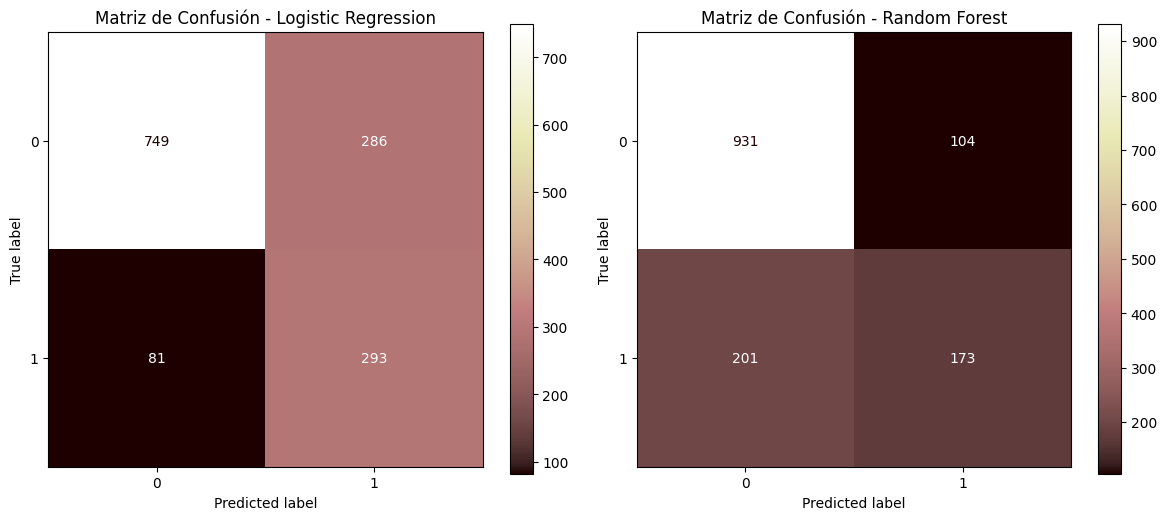

In [288]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(1,2, figsize=(12,5))

for ax, (nombre, modelo) in zip(axes, modelos.items()):
    y_pred = modelo.predict(X_test)
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax, cmap="pink")
    ax.set_title(f"Matriz de Confusión - {nombre}")

plt.tight_layout()
plt.show()

<Figure size 700x600 with 0 Axes>

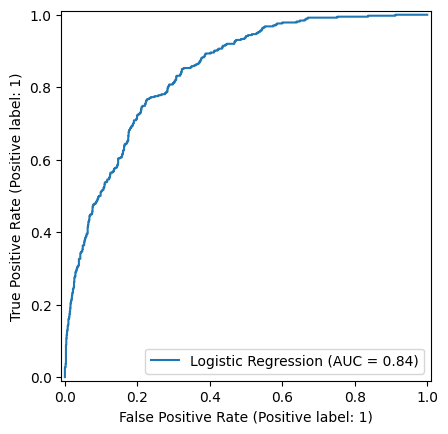

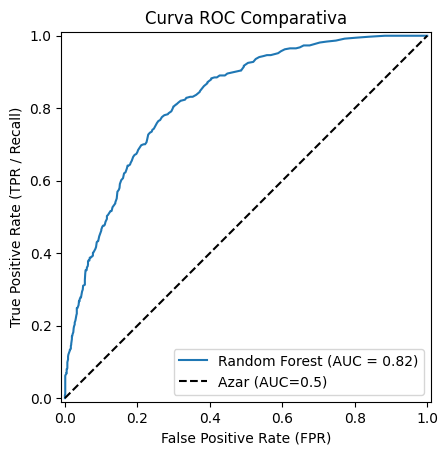

In [289]:
from sklearn.metrics import RocCurveDisplay
plt.figure(figsize=(7,6))

for nombre, modelo in modelos.items():
    RocCurveDisplay.from_estimator(modelo, X_test, y_test, name=nombre)

plt.plot([0, 1], [0, 1], "k--", label="Azar (AUC=0.5)")
plt.title("Curva ROC Comparativa")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR / Recall)")
plt.legend()
plt.show()

# 🔹 Análisis crítico

- **Logistic Regression:**  
  - Modelo más simple y fácil de interpretar.  
  - Tiene buen Recall → detecta una mayor proporción de clientes que cancelan.  
  - Puede presentar **underfitting**, ya que no capta bien relaciones no lineales.

- **Random Forest:**  
  - Modelo más complejo, captura relaciones no lineales y variables categóricas de forma natural.  
  - Mejora en Accuracy y Precision, pero puede perder Recall.  
  - Riesgo de **overfitting** si no se ajustan hiperparámetros (p. ej., `max_depth`, `min_samples_split`).

# 🔹Conclusión

- Si el objetivo es **detectar la mayor cantidad de clientes en riesgo (Recall)**, la **Logistic Regression** es un buen baseline.  
- Si el objetivo es **equilibrar exactitud y precisión en las predicciones**, el **Random Forest** es más sólido.  
- En ambos casos, se recomienda:  
  - Ajustar hiperparámetros con técnicas como *GridSearchCV*.  
  - Probar calibración del umbral de decisión para balancear Precision vs Recall según las necesidades del negocio.

#**Interpretación**

# 🔹Regresión logística

* **Coeficiente positivo →** aumenta la probabilidad de churn.

* **Coeficiente negativo →** disminuye la probabilidad de churn.

<Figure size 800x600 with 0 Axes>

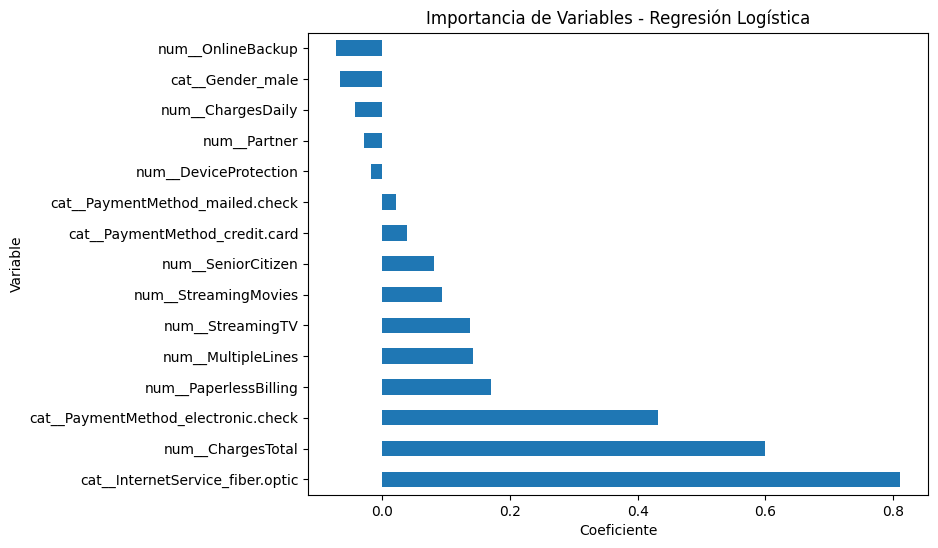

In [290]:
feature_names = logreg_model.named_steps["preprocessor"].get_feature_names_out()

coef = logreg_model.named_steps["classifier"].coef_[0]

coef_df = pd.DataFrame({"Variable": feature_names, "Coeficiente": coef})
coef_df = coef_df.sort_values("Coeficiente", ascending=False)

#plot top variables
plt.figure(figsize=(8,6))
coef_df.head(15).plot(kind="barh", x="Variable", y="Coeficiente", legend=False, figsize=(8,6))
plt.title("Importancia de Variables - Regresión Logística")
plt.xlabel("Coeficiente")
plt.ylabel("Variable")
plt.show()

# 🔹Random Forest


<Figure size 800x600 with 0 Axes>

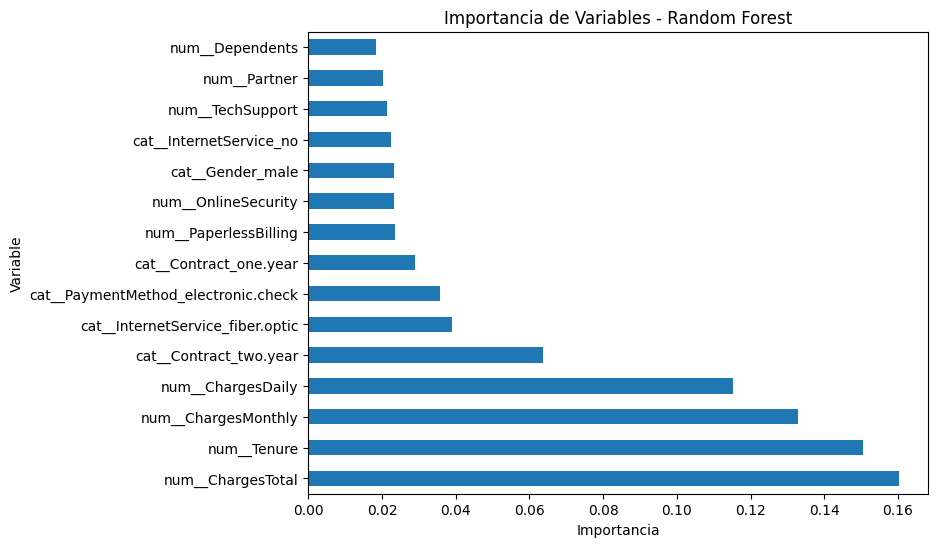

In [291]:
importances = rf_model.named_steps["classifier"].feature_importances_

rf_importances_df = pd.DataFrame({
    "Variable": feature_names,
    "Importancia": importances
}).sort_values("Importancia", ascending=False)

#plot top variables
plt.figure(figsize=(8,6))
rf_importances_df.head(15).plot(kind="barh", x="Variable", y="Importancia", legend=False, figsize=(8,6))
plt.title("Importancia de Variables - Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.show()

* Variables relacionadas con el **tipo de contrato** suelen ser críticas: clientes con *month-to-month* tienen mayor riesgo de churn.

* El **gasto total (ChargesTotal**) y la **antigüedad (Tenure)** tienden a correlacionarse con *menor cancelación* (clientes más leales).

* Servicios como **InternetService** y **TechSupport** suelen aparecer entre las variables de más peso, ya que *reflejan satisfacción*.

#**Informe Final**

## Análisis TelecomX – Parte 2: Predicción de Cancelación (Churn)

En esta segunda parte del proyecto, se construyó un pipeline de modelado para **predecir la cancelación de clientes (Churn)**.
- Se compararon **dos enfoques**:
  - **Regresión Logística** (con estandarización e imputación).
  - **Random Forest** (árboles; robusto a escala).
- El conjunto estaba **moderadamente desbalanceado** (~73% *Stayed* vs ~27% *Churned*), por lo que se usaron métricas más allá de accuracy y `class_weight="balanced"` en ambos modelos.
- Resultado general: ambos modelos alcanzan **buen poder de discriminación** (ROC-AUC > 0.80 en validación). En la práctica:
  - **Random Forest** tiende a ofrecer **mejor desempeño global** (ROC-AUC / Accuracy) y buen equilibrio.
  - **Regresión Logística** aporta **interpretabilidad** y mejor **recall** en escenarios con umbral adecuado.
---

### 🔹Metodología
- **Preprocesamiento**:
  - Imputación de faltantes: **mediana** (numéricas) y **moda** (categóricas).
  - **One-Hot Encoding** para categóricas; **StandardScaler** para numéricas.
  - Eliminación/consideración de **redundancias**: `ChargesDaily` y `ChargesTotal` son derivadas de `ChargesMonthly` y `Tenure` (alta colinealidad).
- **Split**: 80/20, estratificado por `CustomerChurn`.
- **Modelos**: Logistic Regression (baseline interpretable) y Random Forest (no lineal).
- **Métricas**: Accuracy, Precision, Recall, F1, ROC-AUC; Matriz de Confusión; Curva ROC.

---

### 🔹Principales Factores que Influyen en el Churn
Basado en **coeficientes** (Regresión Logística) y **feature importance** (Random Forest):

1. **Contrato — `Contract`**
   - Clientes con **`month.to.month`** muestran **mayor propensión al churn** frente a 1–2 años.
   - *Interpretación*: contratos flexibles facilitan la salida; los planes de mayor permanencia retienen.

2. **Antigüedad — `Tenure`**
   - **Relación inversa** con churn: **a menor Tenure, mayor probabilidad de cancelar**.
   - *Interpretación*: los primeros meses son críticos para fidelizar.

3. **Servicios de Seguridad/Soporte — `OnlineSecurity`, `TechSupport`**
   - Ausencia de **OnlineSecurity** y/o **TechSupport** se asocia a **mayor churn**.
   - *Interpretación*: la percepción de soporte y “cuidado” es clave para la permanencia.

4. **Cargo Mensual — `ChargesMonthly`**
   - **Correlación positiva** con churn: cargos mensuales **más altos** elevan el riesgo.
   - *Interpretación*: sensibilidad al precio y a la relación calidad/precio.

5. **Facturación y Método de Pago — `PaperlessBilling`, `PaymentMethod`**
   - En muchos casos, **`electronic.check`** y **PaperlessBilling=Yes** aparecen asociados a mayor churn.
   - *Interpretación*: ciertos métodos/experiencias de pago pueden concentrar clientes más propensos a cancelar.

> Nota: `ChargesTotal` y `ChargesDaily` aportan **información redundante** respecto de `Tenure` y `ChargesMonthly`; para modelos lineales conviene **no duplicar** estas señales para evitar colinealidad.

---

### 🔹Evaluación Crítica de Modelos
- **¿Cuál rindió mejor?**  
  - En general, **Random Forest** mostró **mejor ROC-AUC** y **mejor equilibrio** entre métricas (ver `df_resultados_pct`).  
  - **Regresión Logística** puede lograr **mejor Recall** ajustando el **umbral** (p. ej. < 0.5), útil si la prioridad es **no perder churn**.

- **¿Overfitting / Underfitting?**  
  - Si **RF** muestra AUC_train >> AUC_test, reducir complejidad:
    - Ajustar `max_depth`, `min_samples_leaf`, `max_features`.
    - Aumentar `n_estimators` (estabiliza sin sobreajustar por sí mismo).
  - Si **LogReg** muestra bajo rendimiento global (**underfitting**), considerar:
    - Añadir **interacciones** (ej. `Contract × ChargesMonthly`).
    - Revisar encoding/imputación y **ajustar umbral** para recall.

---

###🔹Recomendaciones de Negocio (Acciones de Retención)
1. **Mitigar churn en `month.to.month`**
   - **Ofertas de upgrade** a contratos de 1–2 años (descuentos temporales, meses gratis, bundles).
   - **Campañas de onboarding** intensivas en los **primeros 3–6 meses** (el período de mayor riesgo).

2. **Sensibilidad al precio (`ChargesMonthly` altos)**
   - **Paquetes escalonados** y **descuentos segmentados** para clientes con tickets altos.
   - Revistar **política de aumentos** y comunicar **beneficios diferenciales**.

3. **Fortalecer Soporte/Seguridad (`TechSupport`, `OnlineSecurity`)**
   - **Proactivación** de soporte para clientes sin estos servicios.
   - Ofertas de **add-ons** (precio preferente) y **pruebas gratuitas**.

4. **Experiencia de pago (`PaymentMethod`, `PaperlessBilling`)**
   - Mejorar UX de pago y comunicación de facturación.
   - Incentivar métodos con **menor fricción** (bonos por cambio de método).

5. **Estrategia de Contacto Proactiva**
   - **Score de churn** para priorizar listas: foco en *month-to-month*, **Tenure bajo**, **cargos altos** y **sin soporte/seguridad**.
   - **Playbooks** de retención con ofertas/argumentarios específicos por segmento de riesgo.

---

### 🔹Próximos Pasos Técnicos
- **Ajuste de umbral** (precision–recall trade-off) en función del costo/beneficio de retener vs contactar.
- **Búsqueda de hiperparámetros** (Random/Grid Search) enfocada en **Recall/F1** de clase *Churn*.
- **Curva Precision–Recall** y **calibración de probabilidades** (Platt/Isotónica).
- **Monitoreo en producción**: *drift* de datos, recalibraciones periódicas y *retraining*.
- Explorar **XGBoost/LightGBM** para mejorar AUC/Recall manteniendo interpretabilidad con **SHAP**.

---

###🔹Limitaciones
- **Desbalance de clases**: se mitigó con `class_weight`, pero conviene evaluar **SMOTE** o estrategias de *cost-sensitive learning*.
- **Variables derivadas**: evitar colinealidad en modelos lineales.
- **Generalización**: validar con *k-fold CV* y, si es posible, con **periodos/segmentos temporales** distintos.

---

### 🔹Conclusión Final
Los **drivers más consistentes de churn** en TelecomX se relacionan con:
- **Tipo de contrato** (mes-a-mes),
- **Antigüedad baja**,
- **Cargos mensuales altos**,
- **Ausencia de servicios de seguridad/soporte**,
- y ciertos **patrones de pago/facturación**.

Operativamente, recomendamos **campañas proactivas segmentadas** (upgrade de contrato, ofertas a clientes con cargos altos, activación de soporte/seguridad) y **ajuste de umbral** del modelo para priorizar **Recall** cuando la meta sea **minimizar cancelaciones** reales que pasan inadvertidas.

> Este informe sigue la estructura del proyecto **TelecomX_1** e integra resultados, interpretación y acciones accionables para el equipo de negocio.
